# 1) Data Preprocessing

## Importing the libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the data set

In [0]:
df = pd.read_csv('spam.tsv',sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
# check null values in dataset
df.isnull().sum()
# no null values in dataset

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [6]:
# check number of ham and spam
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [0]:
# 4825 messages are legitimate that is ham
# and 747 messages are spam messages

## Balancing the data

In [7]:
# select ham data
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [8]:
# select spam data
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [9]:
# check the shape of data
ham.shape, spam.shape

((4825, 4), (747, 4))

In [10]:
spam.shape[0] # output = no of samples in spam data

747

In [0]:
# now we have to select 747 samples from ham to balance the data

In [0]:
ham = ham.sample(spam.shape[0])

In [12]:
ham.shape

(747, 4)

In [0]:
# check the shape of data
ham.shape, spam.shape

# size of ham and spam data is same, now this is the balenced data

((747, 4), (747, 4))

In [0]:
# append spam data into ham data
data = ham.append(spam,ignore_index=True)

In [14]:
data.head()
# at the starting we have all the ham data

,label,message,length,punct
0,ham,Hey we can go jazz power yoga hip hop kb and y...,54,0
1,ham,"Got fujitsu, ibm, hp, toshiba... Got a lot of ...",65,9
2,ham,I'm really not up to it still tonight babe,42,1
3,ham,Ok Chinese food on its way. When I get fat you...,69,3
4,ham,"Keep ur problems in ur heart, b'coz nobody wil...",350,24


In [15]:
data.tail()
# at the end we have all the spam data

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


In [16]:
data.shape # final shape of the data

(1494, 4)

## Data Visualization

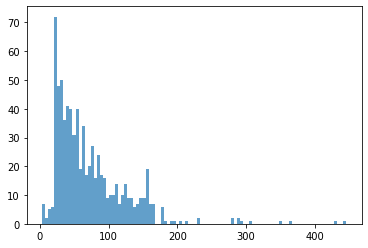

In [17]:
# plot histogram of length for ham messages
plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7)
plt.show()
# from the histogram we can say that, the number of charactors in ham messages are less than 100

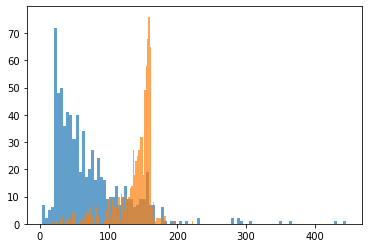

In [18]:
# plot histogram of length for ham and spam both
plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7)
plt.show()

In [0]:
# It looks like there's a small range of values where a message is more likely to be spam than ham

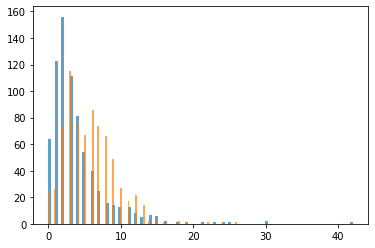

In [20]:
# plot histogram of punct for ham and spam both
plt.hist(data[data['label']=='ham']['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'], bins=100, alpha=0.7)
plt.show()

In [0]:
# here we are not getting more information

## Split the data into train & test sets

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(data['message'],data['label'],test_size=0.3,
                                                    random_state=0, shuffle=True)

In [23]:
x_train

1438      You have 1 new message. Please call 08715205273
431     Dear,regret i cudnt pick call.drove down frm c...
194      Lol no ouch but wish i'd stayed out a bit longer
240     Dunno lei... I might b eatin wif my frens... I...
1309    Had your mobile 11 months or more? U R entitle...
                              ...                        
763     Your free ringtone is waiting to be collected....
835     XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
1216    Dorothy@kiefer.com (Bank of Granite issues Str...
559     Babe! How goes that day ? What are you up to ?...
684                      Why didn't u call on your lunch?
Name: message, Length: 1045, dtype: object

In [24]:
y_train

1438    spam
431      ham
194      ham
240      ham
1309    spam
        ... 
763     spam
835     spam
1216    spam
559      ham
684      ham
Name: label, Length: 1045, dtype: object

# 2) Building the Model (Random Forest)

In [0]:
from sklearn.pipeline import Pipeline
# there will be lot of repeated processes for training and testing the dataset separately,
# to avoid that we are using pipeline

from sklearn.feature_extraction.text import TfidfVectorizer
# we are importing TfidfVectorizer to utilize bag of words model in sklearn

from sklearn.ensemble import RandomForestClassifier

In [0]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('classifier',RandomForestClassifier(n_estimators=100))])

In [27]:
classifier.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [0]:
# all the parameters that you can see while training the model are the default parameters

# 3) Predicting the results (Random Forest)

In [0]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [0]:
y_pred = classifier.predict(x_test)

In [30]:
# confusion_matrix
confusion_matrix(y_test, y_pred)

array([[226,   1],
       [ 18, 204]])

In [0]:
# ham and spam
# spam and ham

In [31]:
# classification_report
print(classification_report(y_test, y_pred))
# we are getting almost 95% accuracy

              precision    recall  f1-score   support

         ham       0.93      1.00      0.96       227
        spam       1.00      0.92      0.96       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [32]:
accuracy_score(y_test, y_pred)
# 94.5% accuracy

0.9576837416481069

In [33]:
# Predict a real message
classifier.predict(['Hello, You are learning atural Language Processing'])

array(['ham'], dtype=object)

In [34]:
classifier.predict(['Hope you are doing good and learning new things !'])

array(['ham'], dtype=object)

In [35]:
classifier.predict(['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677'])

array(['spam'], dtype=object)

# 4) Building the model (SVM)

In [0]:
from sklearn.svm import SVC

In [0]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('classifier',SVC(C=100,gamma='auto'))])

In [38]:
classifier.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ov

# 5) Predicting the results (SVM)

In [0]:
y_pred = classifier.predict(x_test)

In [40]:
# confusion_matrix
confusion_matrix(y_test, y_pred)

array([[222,   5],
       [ 16, 206]])

In [41]:
accuracy_score(y_test, y_pred)

0.9532293986636972

In [42]:
# Predict a real message
classifier.predict(['Hello, You are learning atural Language Processing'])

array(['ham'], dtype=object)

In [43]:
classifier.predict(['Hope you are doing good and learning new things !'])

array(['ham'], dtype=object)

In [44]:
classifier.predict(['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677'])

array(['spam'], dtype=object)